# 🐍 <a href="https://meetup-python-grenoble.github.io" target="_blank">Meetup Python Grenoble</a>
# 💻 Atelier "Python Mapping for Good"
## 🗓️ Jeudi 28 mars 2024 - 19h - <a href="https://turbine.coop" target="_blank">La Turbine</a>
## Jessica Pic | Elise Pupier | Pierre-Loïc Bayart

## ⚙️ Installation et import des bibliothèques

In [25]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import plotly.express as px

## 📚 Liens vers la documentation des bibliothèques

- <a href="https://geopandas.org/en/stable/" target="_blank">GeoPandas</a>
- <a href="https://matplotlib.org" target="_blank">Matplotlib</a>
- <a href="https://python-visualization.github.io/folium/latest/" target="_blank">Folium</a>
- <a href="https://plotly.com/python/" target="_blank">Plotly</a>

## 🗺️ Récupération de données GeoJSON

Le projet Github france-geojson propose au format GeoJSON les cartes des **régions, départements, arrondissements, cantons et communes de France (métropole et départements d'outre-mer)** à partir des données publiées par l'<a href="https://www.ign.fr" target="_blank">IGN</a> et l'<a href="https://www.insee.fr/fr/accueil" target="_blank">INSEE</a>. Lien vers le site : https://france-geojson.gregoiredavid.fr

- Récupérer le fichier **GeoJSON** de l'**isère** sur le site france-geojson
- **Importer le fichier** dans le Jupyter Lite
- Avec <a href="https://geopandas.org/en/stable/" target="_blank">GeoPandas</a>, insérer les données dans un **GeoDataframe**
- Afficher ces données sur une **carte** (avec Matplotlib, Plotly ou Folium) avec **toutes bonnes pratiques de cartographie**

In [2]:
gdf = gpd.read_file("departement-38-isere.geojson")
gdf

,code,nom,geometry
0,38,Isère,"POLYGON ((5.62374 45.61327, 5.62302 45.60428, ..."


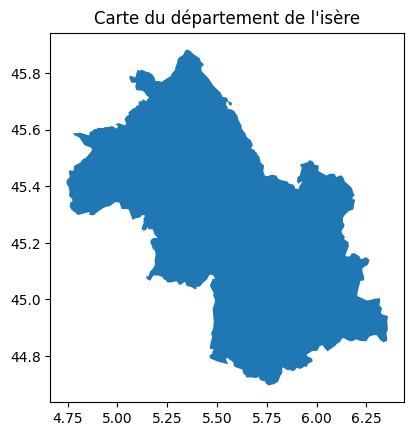

In [3]:
gdf.plot()
plt.title("Carte du département de l'isère")
plt.show()

In [10]:
gdf.explore()

In [22]:
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry.__geo_interface__,
                           mapbox_style="carto-positron", 
                           zoom=7,
                           color="code",
                           center={"lat": 45.188529, "lon": 5.724524},
                           opacity=0.5)
fig.show()

## Choix du système de coordonnées de référence (CRS)

La proprité gdf.area permet de récupérer la surface du département de l'isère
- Récupérer la surface du département de l'isère. Pourquoi cet avertissement ?
- Changer de système de coordonnées de référence pour passer en Web Mercator (EPSG:3857) grâce à la méthode gdf.to_crs(). Est-ce la bonne valeur de la surface ? Pourquoi ?
- Changer de système de coordonnées de référence pour passer en RGF93 / Lambert-93 (EPSG:2154)

In [4]:
gdf.area

/var/folders/vs/m1mxgk2x70dfhx9ydqjvgpf00000gp/T/ipykernel_2159/138307179.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.area


0    0.903121
dtype: float64

In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
gdf_projected = gdf.to_crs("EPSG:3857")
gdf_projected.area

0    1.590113e+10
dtype: float64

In [24]:
gdf_projected.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdf_projected = gdf.to_crs("EPSG:2154")
gdf_projected.area

0    7.866308e+09
dtype: float64

In [7]:
gdf_projected.crs

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Même chose pour l'agglomération de Grenoble